In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

df_T = pd.read_csv('../../datasets/train.csv')

In [3]:
df_T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_T_Name = df_T[['Name']]
df_T_Name

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [5]:
df_T_Name.isnull().sum()

Name    0
dtype: int64

In [6]:
# List the Last Names
pattern = r'^(\w+)'
df_T_Name['Name'].str.extract(pattern)

,0
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [22]:
#  결혼여부 확인 Func
def married(name):
    if name == 'Miss':
        return 'Single'
    elif name == 'Mrs':
        return 'Married'
    else: return 'Unknown'

In [23]:
#  Extract the Title
marrige_pattern = r'^\w+\,+\s+(\w+)'
df_T_Name_stat = df_T_Name[['Name']]
df_T_Name_stat['Title'] = df_T_Name['Name'].str.extract(marrige_pattern)
df_T_Name_stat

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [24]:
#  Apply the Func
df_T_Name_stat['M/S'] = df_T_Name_stat['Title'].apply(married)
df_T_Name_stat


,Name,Title,M/S
0,"Braund, Mr. Owen Harris",Mr,Unknown
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Married
2,"Heikkinen, Miss. Laina",Miss,Single
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Married
4,"Allen, Mr. William Henry",Mr,Unknown
...,...,...,...
886,"Montvila, Rev. Juozas",Rev,Unknown
887,"Graham, Miss. Margaret Edith",Miss,Single
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,Single
889,"Behr, Mr. Karl Howell",Mr,Unknown


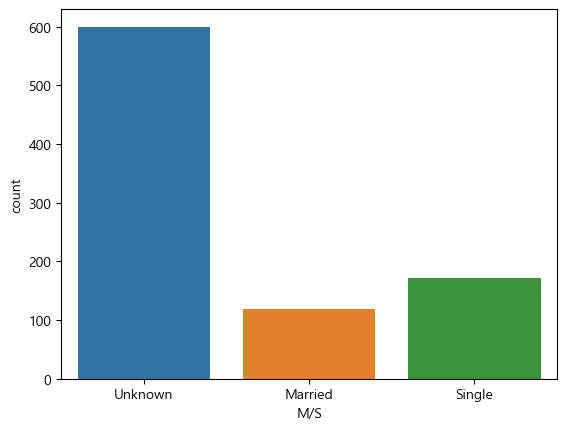

In [26]:
chart = sns.countplot(data=df_T_Name_stat, x='M/S')

In [27]:
df_T_Name_stat['M/S'].value_counts()

Unknown    600
Single     172
Married    119
Name: M/S, dtype: int64